In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import cmocean
from matplotlib import rcParams
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib notebook

rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
rc('text', usetex='false') 
rcParams.update({'font.size': 12})

In [3]:
figures_folder = 'C:/Users/Deepak/Dropbox/ActiveMassTransport_Vorticella_SinkingAggregates/TrackAnalysis_results/Plots'

if(not os.path.exists(figures_folder)):
    os.makedirs(figures_folder)

folder = 'C:/Users/Deepak/Dropbox/ActiveMassTransport_Vorticella_SinkingAggregates/TrackAnalysis_results/MSD_analysis/TaylorFunctionFitting_Analysis11-Sep-2020'

files = os.listdir(folder)

data = pd.DataFrame()

for file in files:
    
    data = data.append(pd.read_csv(os.path.join(folder, file)), ignore_index = True)

print(len(data))

13


In [4]:
# Set the colors
#cmap = plt.get_cmap("tab20")
cmap = cmocean.cm.algae
cmap_new = []
ColorStyle={}
for ii in np.linspace(int(0),int(cmap.N),max(data['Condition'])+1,dtype='int'):
    cmap_new.append(cmap(ii))

ColorStyle = cmap_new

print(len(ColorStyle))

print(ColorStyle)
#for ii, org in enumerate(Organisms):
#    ColorStyle[org] = cmap_new[ii]
    
# Set the markers
MarkerStyle = {0:'o',1:'s', 2:'.', 3:'d',4:'^',5:'p',6:'v',7:'*'}

8
[(0.8429022637670928, 0.9769128443086749, 0.8146495714674897, 1.0), (0.664784536551286, 0.852957298492747, 0.6155811388293936, 1.0), (0.4666445818616462, 0.7407231498818753, 0.43688698757234556, 1.0), (0.2051671661243616, 0.6409273967897468, 0.3242268145630949, 1.0), (0.02716440603849906, 0.5165779238412416, 0.3001150958048797, 1.0), (0.08626466273198904, 0.38961003829855795, 0.24913795832584001, 1.0), (0.10021730068672999, 0.26299881758636445, 0.17152986242704915, 1.0), (0.06885643403782271, 0.14208946011590498, 0.07903362825094448, 1.0)]


# Fit a Stokes law curve to the data based on the mean density mismatch for all aggregates

In [7]:

# We exclude outliers from the data
data_new = data.loc[(data['Organism']!='Sphere 002') & (data['Organism']!='Sphere011')]

from lmfit import minimize, Parameters

def stokes_law_residual(params, diameter, data, eps_data):
    
    g = params['g']
    delta_rho = params['delta_rho']
    mu = params['mu']
    
    model = (diameter**2)*delta_rho*g/(18*mu)
    
    return (data-model)


params = Parameters()

params.add('g', value=9.81, vary = False)
params.add('mu', value=8.89e-4, vary = False)
params.add('delta_rho', value=1, vary = True)


# Load data into arrays (in SI units)
Diameters = (1e-3)*data_new['OrgSize_mean'].to_numpy()
SinkingSpeed_data = (1e-3)*data_new['v_Z'].to_numpy()

SinkingSpeed_standard_error =  (1e-3)*data_new['sigma_v_Z'].to_numpy()

print(SinkingSpeed_data)
print(SinkingSpeed_standard_error)



out = minimize(stokes_law_residual, params, args = (Diameters, SinkingSpeed_data, SinkingSpeed_standard_error**2))

# Print the results
print(50*'*')
print('Best fit density: {} kg/m^3'.format(out.params['delta_rho'].value))
print(50*'*')
# Calculate theoretical sinking speed based on best-fit Stokes-law
diameter_array = np.linspace(0.7, 2.0, 20)*1e-3 # diameter array in m


TheoreticalSinkingSpeed = (diameter_array**2)*out.params['delta_rho'].value*params['g']/(18*params['mu'])

print(TheoreticalSinkingSpeed)

[0.00045936 0.00038282 0.00047823 0.00041147 0.0005201  0.00054812
 0.00051686 0.00126255 0.0004684  0.00038002 0.00113109]
[1.08447045e-06 2.74112309e-06 9.38890202e-06 4.77883525e-06
 1.07876674e-05 5.27612607e-06 3.87239741e-06 5.10087702e-06
 2.62111197e-06 3.38751100e-06 1.62950020e-05]
**************************************************
Best fit density: 0.6910802661527397 kg/m^3
**************************************************
[0.0002076  0.00025016 0.0002967  0.00034719 0.00040166 0.00046009
 0.00052249 0.00058886 0.00065919 0.00073349 0.00081176 0.00089399
 0.00098019 0.00107036 0.00116449 0.00126259 0.00136466 0.00147069
 0.0015807  0.00169466]


# Plots

<IPython.core.display.Javascript object>


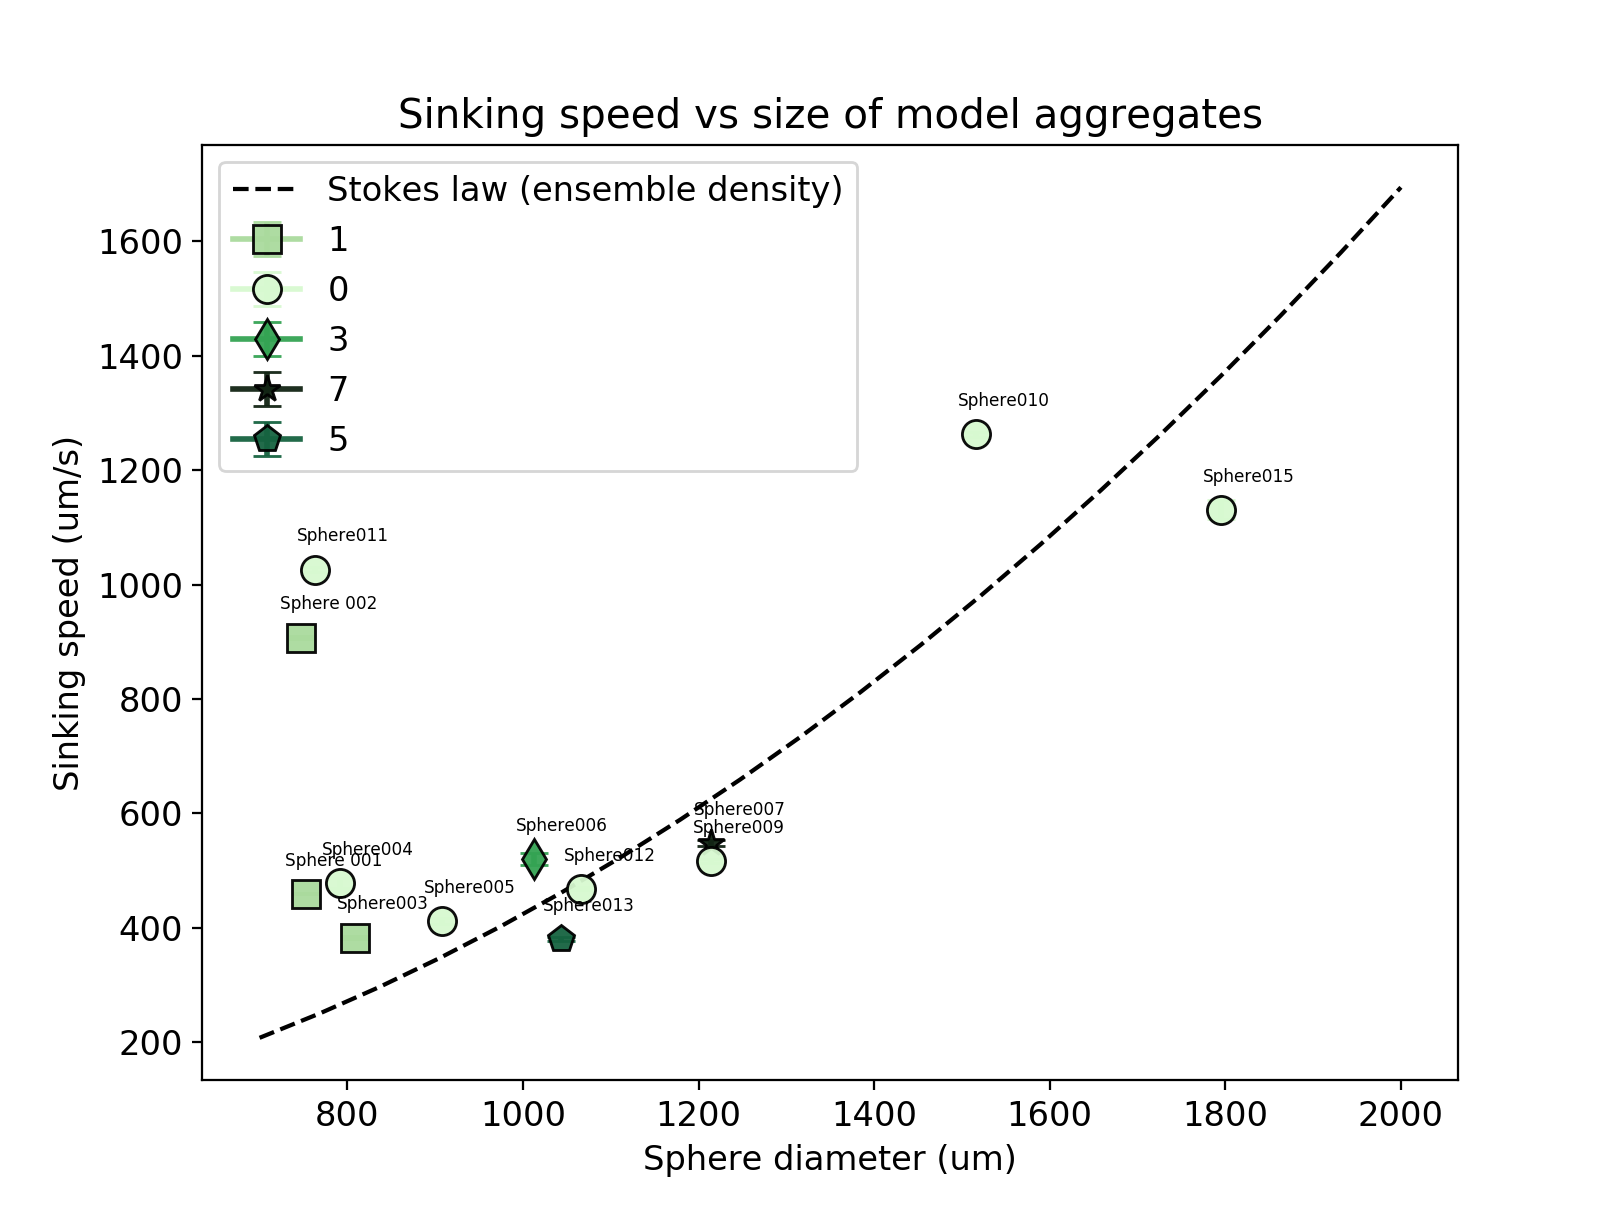

0
Sphere 001
1
1
Sphere 002
1
2
Sphere003
1
3
Sphere004
0
4
Sphere005
0
5
Sphere006
3
6
Sphere007
7
7
Sphere009
0
8
Sphere010
0
9
Sphere011
0
10
Sphere012
0
11
Sphere013
5
12
Sphere015
0


In [6]:
# Plot the Mean sinking speed vs Size of sphere, Colored by No:of vorticella
title = 'Sinking speed vs size of model aggregates'

plt.figure(figsize=(8,6))


for ii in range(len(data)):
    print(ii)
    Organism = data['Organism'][ii]
    Condition = data['Condition'][ii]
    
    
    print(Organism)
    print(Condition)
    plt.errorbar(1000*data['OrgSize_mean'][ii], 1000*data['v_Z'][ii], yerr = 1000*data['sigma_v_Z'][ii], color = ColorStyle[Condition], marker = MarkerStyle[Condition], MarkerSize = 10, label = Condition, capsize = 5, linewidth=2, elinewidth=2, alpha=0.95, markeredgecolor = 'k')
    plt.annotate(Organism,(1000*data['OrgSize_mean'][ii],1000*data['v_Z'][ii]), textcoords="offset points", xytext=(10,10), ha='center', fontsize=6)

plt.plot(1e6*diameter_array, 1e6*TheoreticalSinkingSpeed, 'k-', linestyle='--', label = 'Stokes law (ensemble density)')
plt.xlabel('Sphere diameter (um)')
plt.ylabel('Sinking speed (um/s)')
plt.title(title)
    
from collections import OrderedDict

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
#plt.legend(loc=2,prop={'size': 30})
# plt.savefig(os.path.join(figures_folder, title+'_StokesLawFit.png'), dpi =300)
# plt.savefig(os.path.join(figures_folder, title+'_StokesLawFit.svg'), dpi =300)


plt.show()

# Scaling analysis of sinking speed vs size and critical sinking speeds for mass transport

In [80]:
# Critical speed for Sinking vs Turbulence effects on mass transport
D = 1e-9 # Solute diffusivity in m^2/s
epsilon = 1e-8 # Turbulent energy dissipation rate in m^2/s^3
nu = 1e-6 # Kinematic viscosity of water in m^2/s
U_critical_t_s = ((diameter_array/2)**2/(D**(1/2)))*(epsilon/nu)**(3/4)

epsilon_array = np.array([1e-6, 1e-7, 1e-8])

<IPython.core.display.Javascript object>


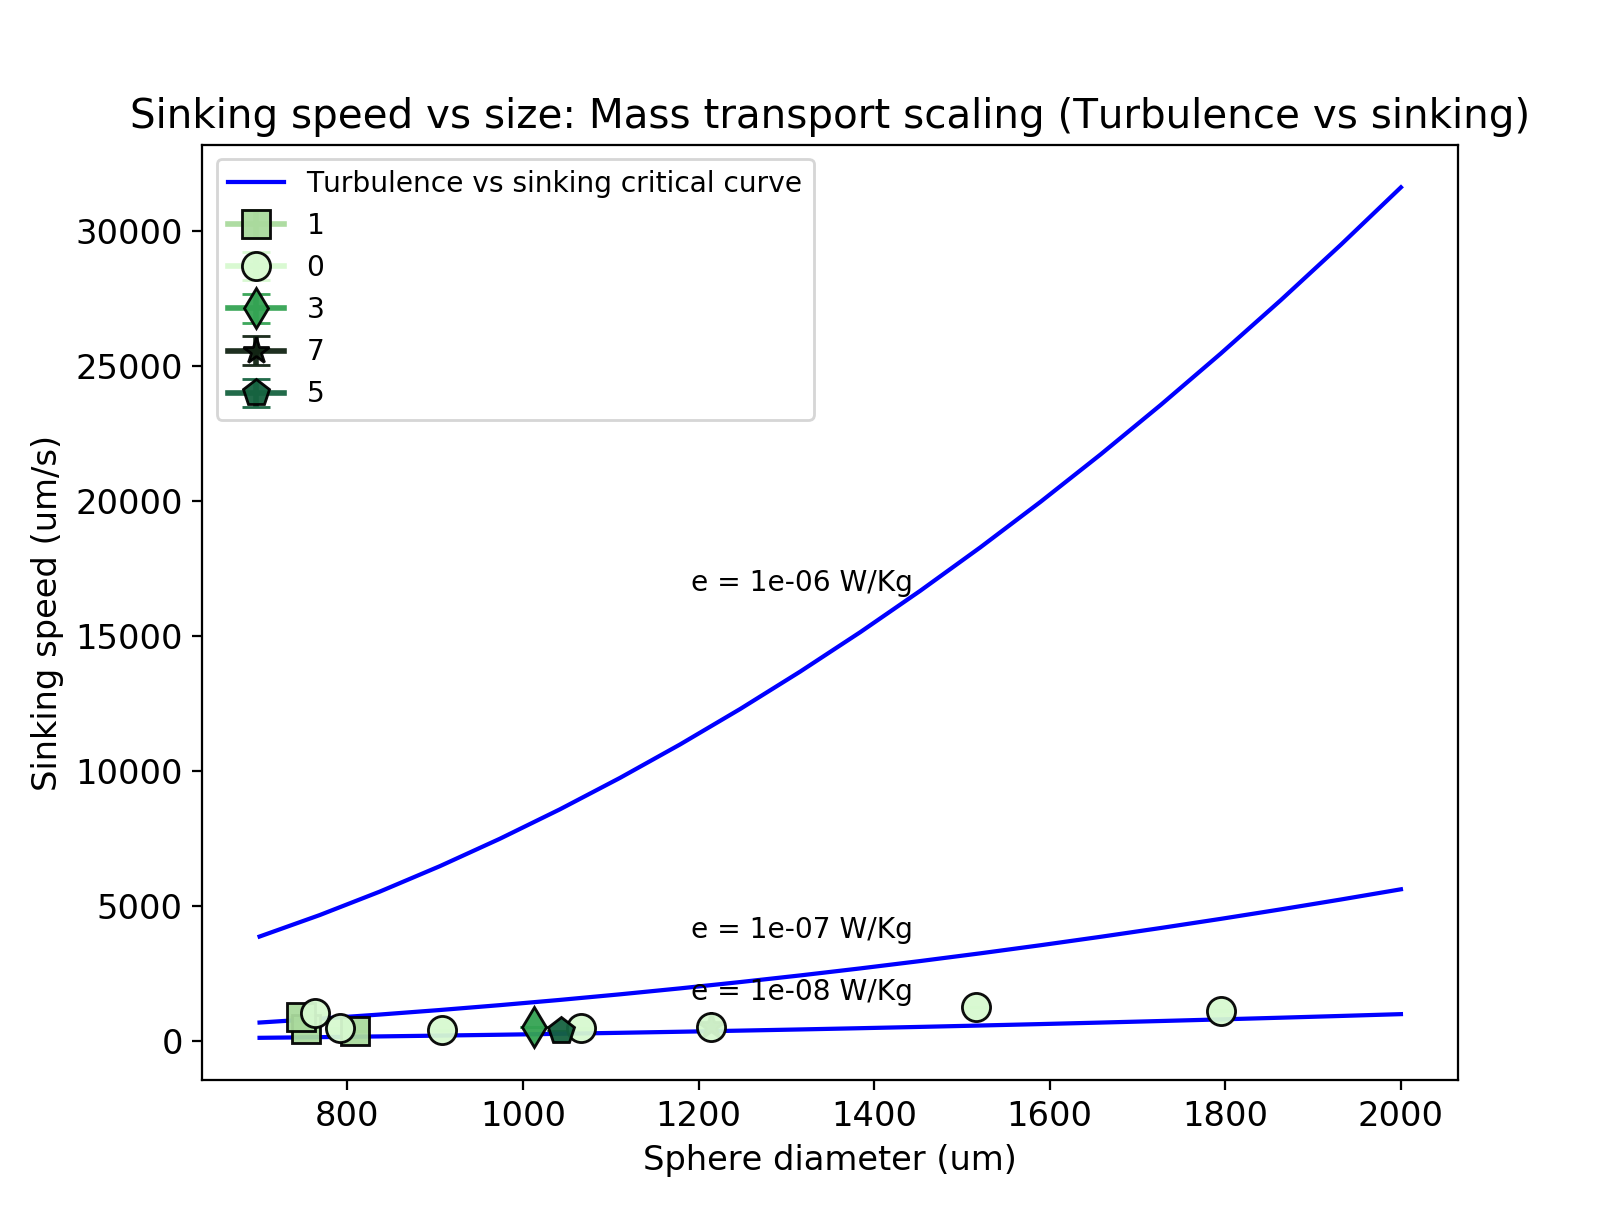

In [81]:
title = 'Sinking speed vs size: Mass transport scaling (Turbulence vs sinking)'

plt.figure(figsize=(8,6))


for ii in range(len(data)):
    Organism = data['Organism'][ii]
    Condition = data['Condition'][ii]

    plt.errorbar(1000*data['OrgSize_mean'][ii], 1000*data['v_Z'][ii], yerr = 1000*data['sigma_v_Z'][ii], color = ColorStyle[Condition], marker = MarkerStyle[Condition], MarkerSize = 10, label = Condition, capsize = 5, linewidth=2, elinewidth=2, alpha=0.95, markeredgecolor = 'k')

for epsilon in epsilon_array:
    U_critical_t_s = ((diameter_array/2)**2/(D**(1/2)))*(epsilon/nu)**(3/4)
    plt.plot(1e6*diameter_array, 1e6*U_critical_t_s, 'b--', linestyle='-', label = 'Turbulence vs sinking critical curve')

    plt.annotate('e = {} W/Kg'.format(epsilon),(1e6*np.mean(diameter_array),(1e6*np.mean(U_critical_t_s))), textcoords="offset points", xytext=(-10,10), ha='center', fontsize=10)

plt.xlabel('Sphere diameter (um)')
plt.ylabel('Sinking speed (um/s)')
plt.title(title)
    
from collections import OrderedDict

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=10)
#plt.legend(loc=2,prop={'size': 30})
plt.savefig(os.path.join(figures_folder, 'TurbulenceVsSinking'+'.png'), dpi =300)
plt.savefig(os.path.join(figures_folder, 'TurbulenceVsSinking'+'.svg'), dpi =300)


plt.show()

In [82]:
F = 1e-12 # Vorticella point force
h = 200e-6 # Vorticell stalk size
mu = 1e-3 # Pa s

F_array = np.array([1.0, 10., 20.])*1e-12

U_critical_a_s =  ((diameter_array/2)**2/(D**(1/2)))*(F/(mu*h**2))**(3/2)

<IPython.core.display.Javascript object>


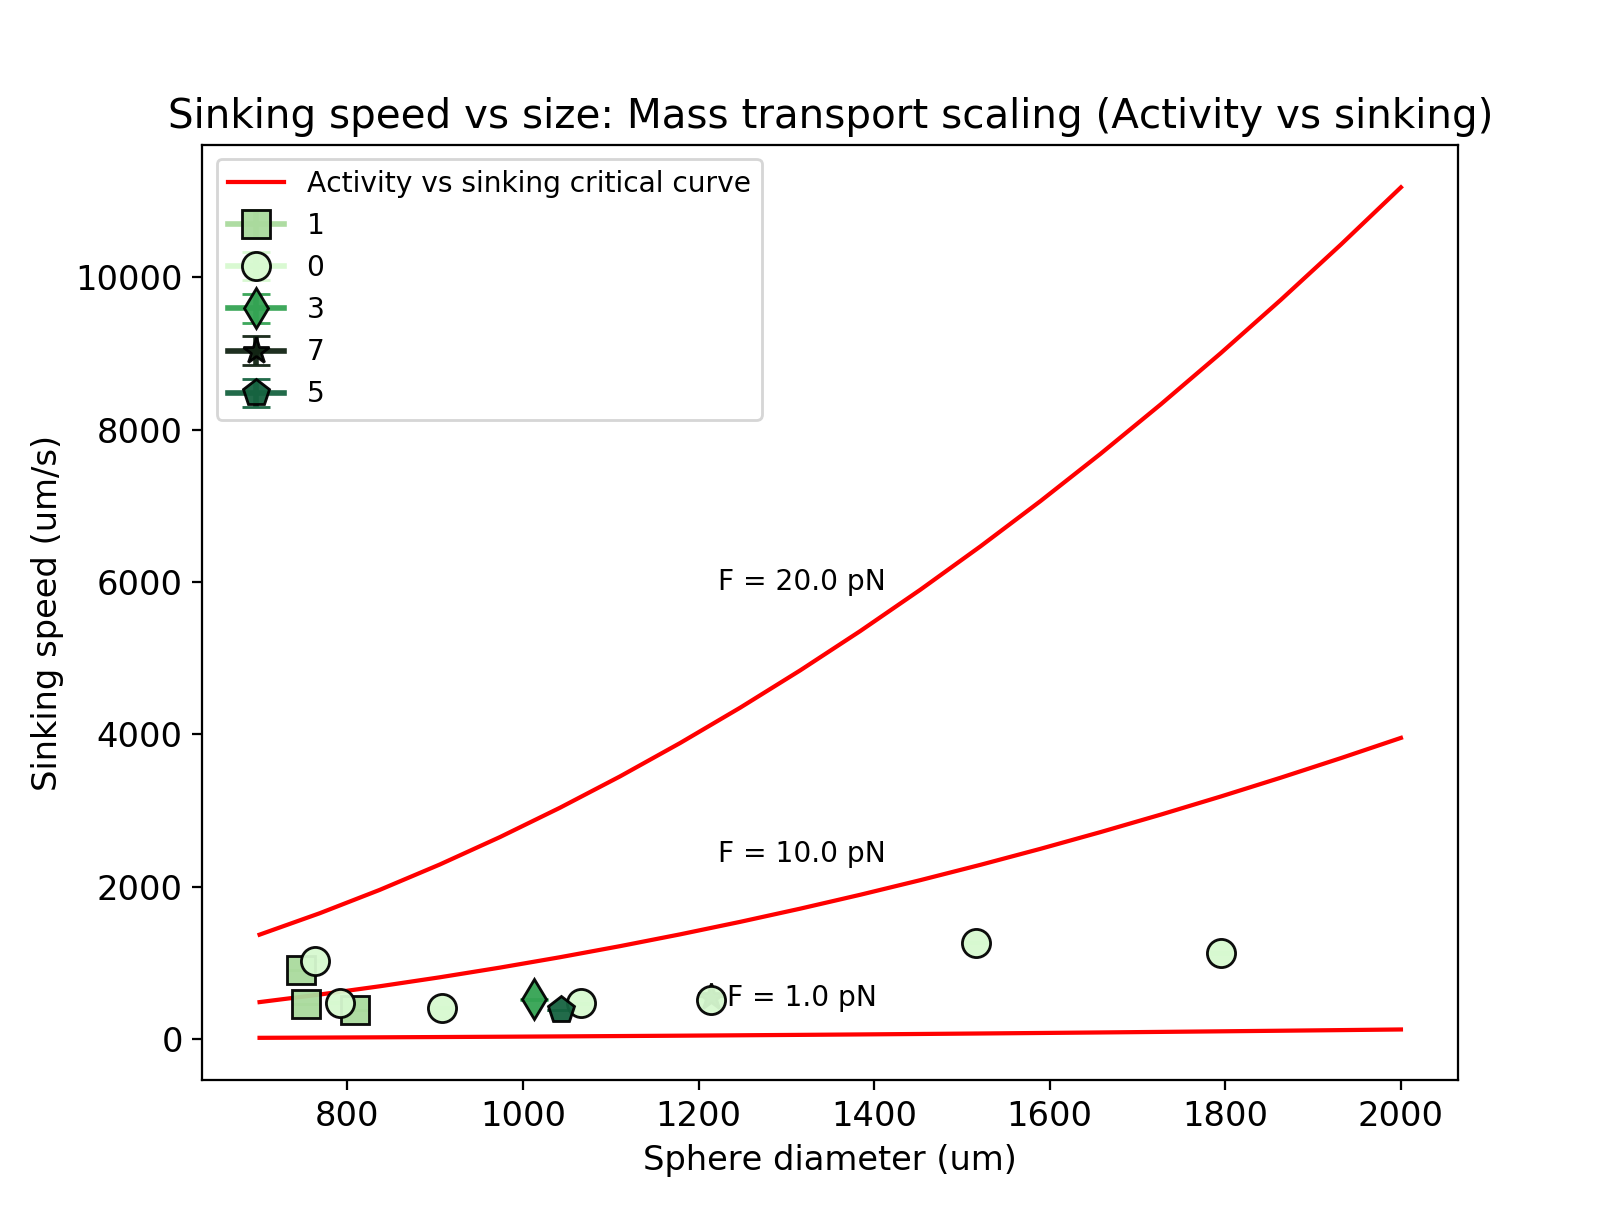

In [83]:
title = 'Sinking speed vs size: Mass transport scaling (Activity vs sinking)'

plt.figure(figsize=(8,6))


for ii in range(len(data)):
    Organism = data['Organism'][ii]
    Condition = data['Condition'][ii]
    plt.errorbar(1000*data['OrgSize_mean'][ii], 1000*data['v_Z'][ii], yerr = 1000*data['sigma_v_Z'][ii], color = ColorStyle[Condition], marker = MarkerStyle[Condition], MarkerSize = 10, label = Condition, capsize = 5, linewidth=2, elinewidth=2, alpha=0.95, markeredgecolor = 'k')
#     plt.annotate(Organism,(1000*data['OrgSize_mean'][ii],1000*data['v_Z'][ii]), textcoords="offset points", xytext=(10,10), ha='center', fontsize=6)


for F in F_array:
    U_critical_a_s =  ((diameter_array/2)**2/(D**(1/2)))*(F/(mu*h**2))**(3/2)
    plt.plot(1e6*diameter_array, 1e6*U_critical_a_s, 'r-', linestyle='-', label = 'Activity vs sinking critical curve')

    plt.annotate('F = {} pN'.format(F*1e12),(1e6*np.mean(diameter_array),(1e6*np.mean(U_critical_a_s))), textcoords="offset points", xytext=(-10,10), ha='center', fontsize=10)


plt.xlabel('Sphere diameter (um)')
plt.ylabel('Sinking speed (um/s)')
plt.title(title)
    
from collections import OrderedDict

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize = 10)
#plt.legend(loc=2,prop={'size': 30})
plt.savefig(os.path.join(figures_folder, 'ActivityVsSinking'+'.png'), dpi =300)
plt.savefig(os.path.join(figures_folder, 'ActivityVsSinking'+'.svg'), dpi =300)


plt.show()

# Alternate BL scaling using velocity instead of velocity gradient

<IPython.core.display.Javascript object>


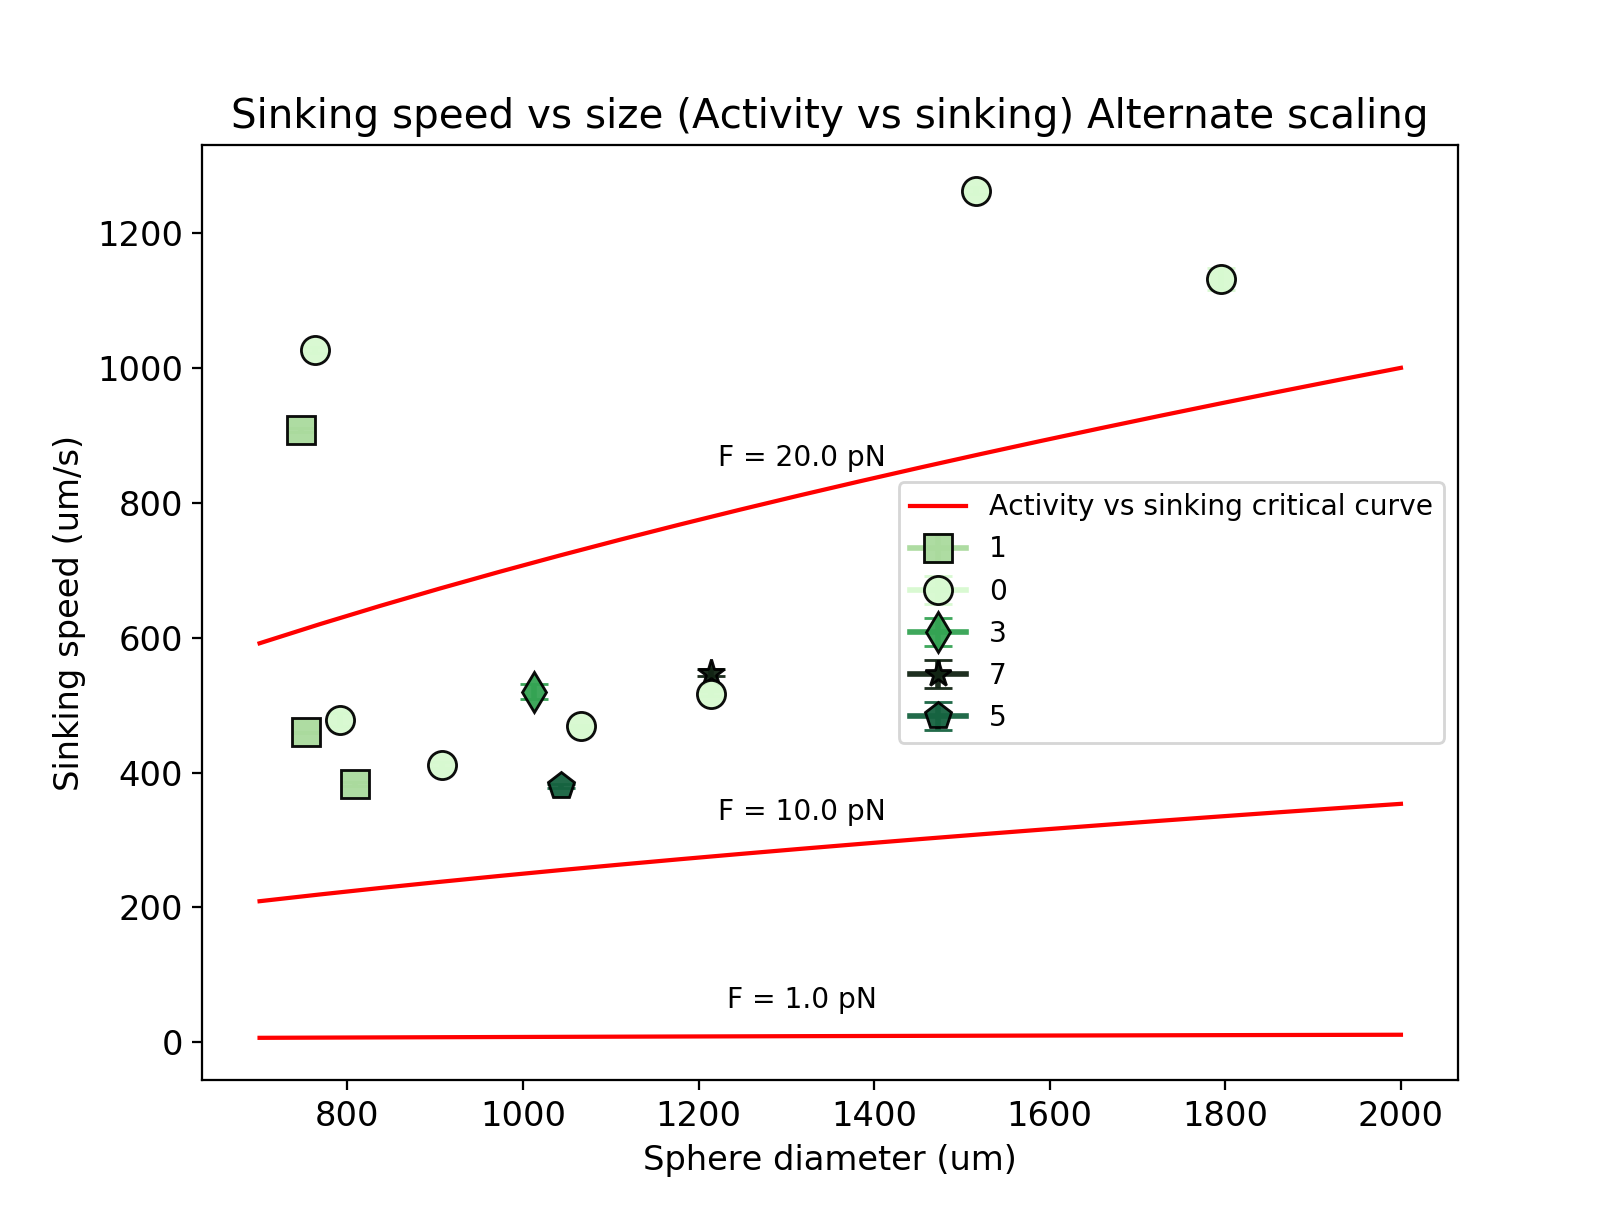

In [89]:
F_array = np.array([1.0, 10.,20.])*1e-12


title = 'Sinking speed vs size (Activity vs sinking) Alternate scaling'

plt.figure(figsize=(8,6))


for ii in range(len(data)):
    Organism = data['Organism'][ii]
    Condition = data['Condition'][ii]
    plt.errorbar(1000*data['OrgSize_mean'][ii], 1000*data['v_Z'][ii], yerr = 1000*data['sigma_v_Z'][ii], color = ColorStyle[Condition], marker = MarkerStyle[Condition], MarkerSize = 10, label = Condition, capsize = 5, linewidth=2, elinewidth=2, alpha=0.95, markeredgecolor = 'k')
#     plt.annotate(Organism,(1000*data['OrgSize_mean'][ii],1000*data['v_Z'][ii]), textcoords="offset points", xytext=(10,10), ha='center', fontsize=6)


for F in F_array:
    U_critical_a_s_1 =  ((diameter_array/2)/D)**(1/2)*(F/(mu*h))**(3/2)
    plt.plot(1e6*diameter_array, 1e6*U_critical_a_s_1, 'r-', linestyle='-', label = 'Activity vs sinking critical curve')

    plt.annotate('F = {} pN'.format(F*1e12),(1e6*np.mean(diameter_array),(1e6*np.mean(U_critical_a_s_1))), textcoords="offset points", xytext=(-10,10), ha='center', fontsize=10)


plt.xlabel('Sphere diameter (um)')
plt.ylabel('Sinking speed (um/s)')
plt.title(title)
    
from collections import OrderedDict

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize = 10)
#plt.legend(loc=2,prop={'size': 30})
plt.savefig(os.path.join(figures_folder, 'ActivityVsSinking_alternatescaling'+'.png'), dpi =300)
plt.savefig(os.path.join(figures_folder, 'ActivityVsSinking_alternatescaling'+'.svg'), dpi =300)


plt.show()